## 1. Problem Statement

Predicting the prices of houses given values of different variables 

## 2. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## 3. Importing Data

In [58]:
df_train = pd.read_csv("C:\Tutorial\Machine-Learning\Datasets\House Prices\\train.csv")
df_test = pd.read_csv("C:\Tutorial\Machine-Learning\Datasets\House Prices\\test.csv")

## 4. Understaning the dataset

In [59]:
df_train.shape

(1460, 81)

In [60]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [61]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [62]:
df_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## 5. Visualisation

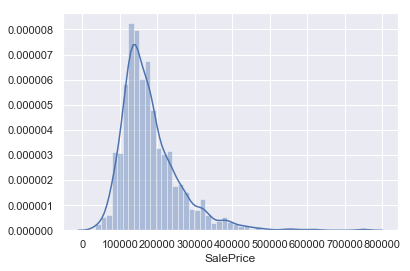

In [63]:
# Histogram

sns.distplot(df_train['SalePrice'])

In [64]:
# Skewness and Kurtosis

print ("Skewness: ",df_train['SalePrice'].skew())
print ("Kurtosis: ",df_train['SalePrice'].kurt())

Skewness:  1.8828757597682129
Kurtosis:  6.536281860064529


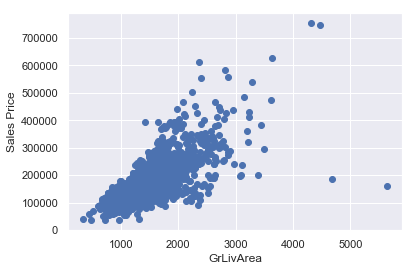

In [65]:
# Relationship of 'Salesprice' with Numerical variables

var1 = 'GrLivArea'            # Above grade (ground) living area square feet
var2 = 'TotalBsmtSF'          # Total square feet of basement area

plt.scatter(df_train[var1],df_train['SalePrice'])
plt.xlabel(var1)
plt.ylabel("Sales Price")
plt.show()

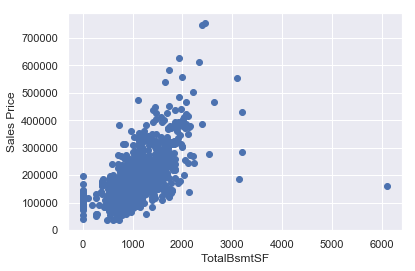

In [66]:
plt.scatter(df_train[var2],df_train['SalePrice'])
plt.xlabel(var2)
plt.ylabel("Sales Price")
plt.show()

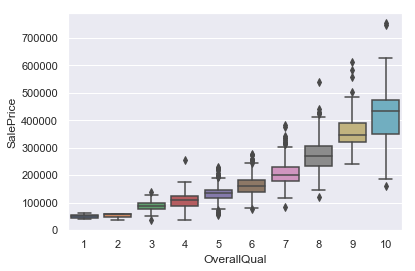

In [67]:
# Relationship of 'Salesprice' with Categorical variables

var1 = 'OverallQual'     # Rates the overall material and finish of the house

sns.boxplot(df_train[var1],df_train["SalePrice"])

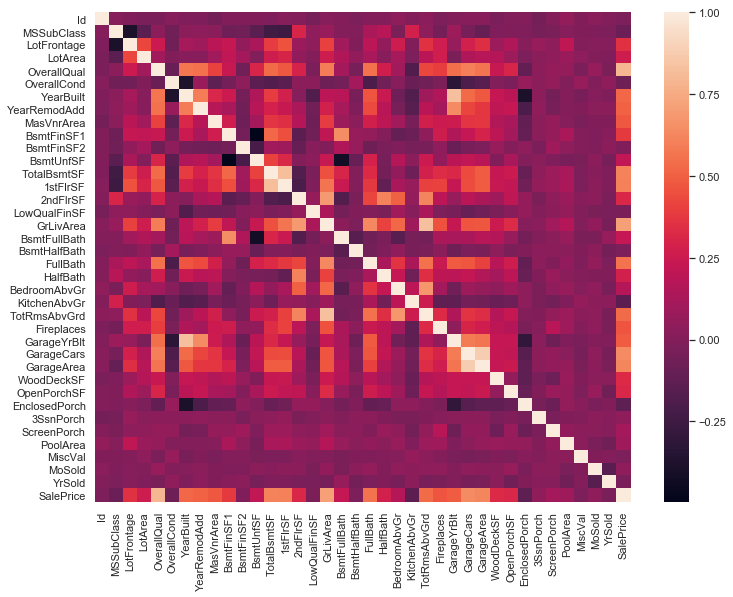

In [68]:
# Correlation Matrix

corrmat = df_train.corr()

f , ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat)
plt.show()

# Using this heatmap we can find the factor by which variables
# are affecting the SalePrice

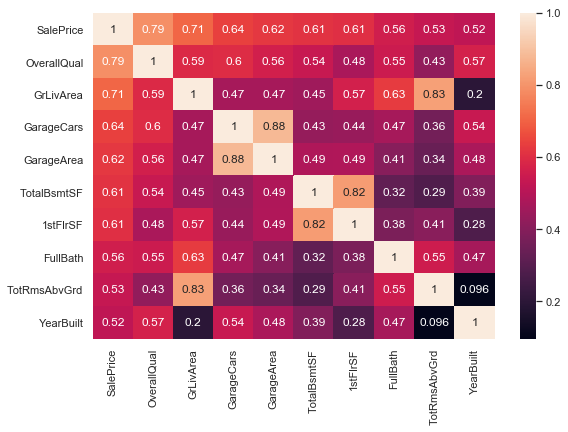

In [69]:
# Top 10 variables correlated with "SalePrice"

k = 10
columns = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[columns].values.T)
f , ax = plt.subplots(figsize = (9,6))
sns.heatmap(cm,annot=True,yticklabels=columns.values, xticklabels=columns.values)
plt.show()

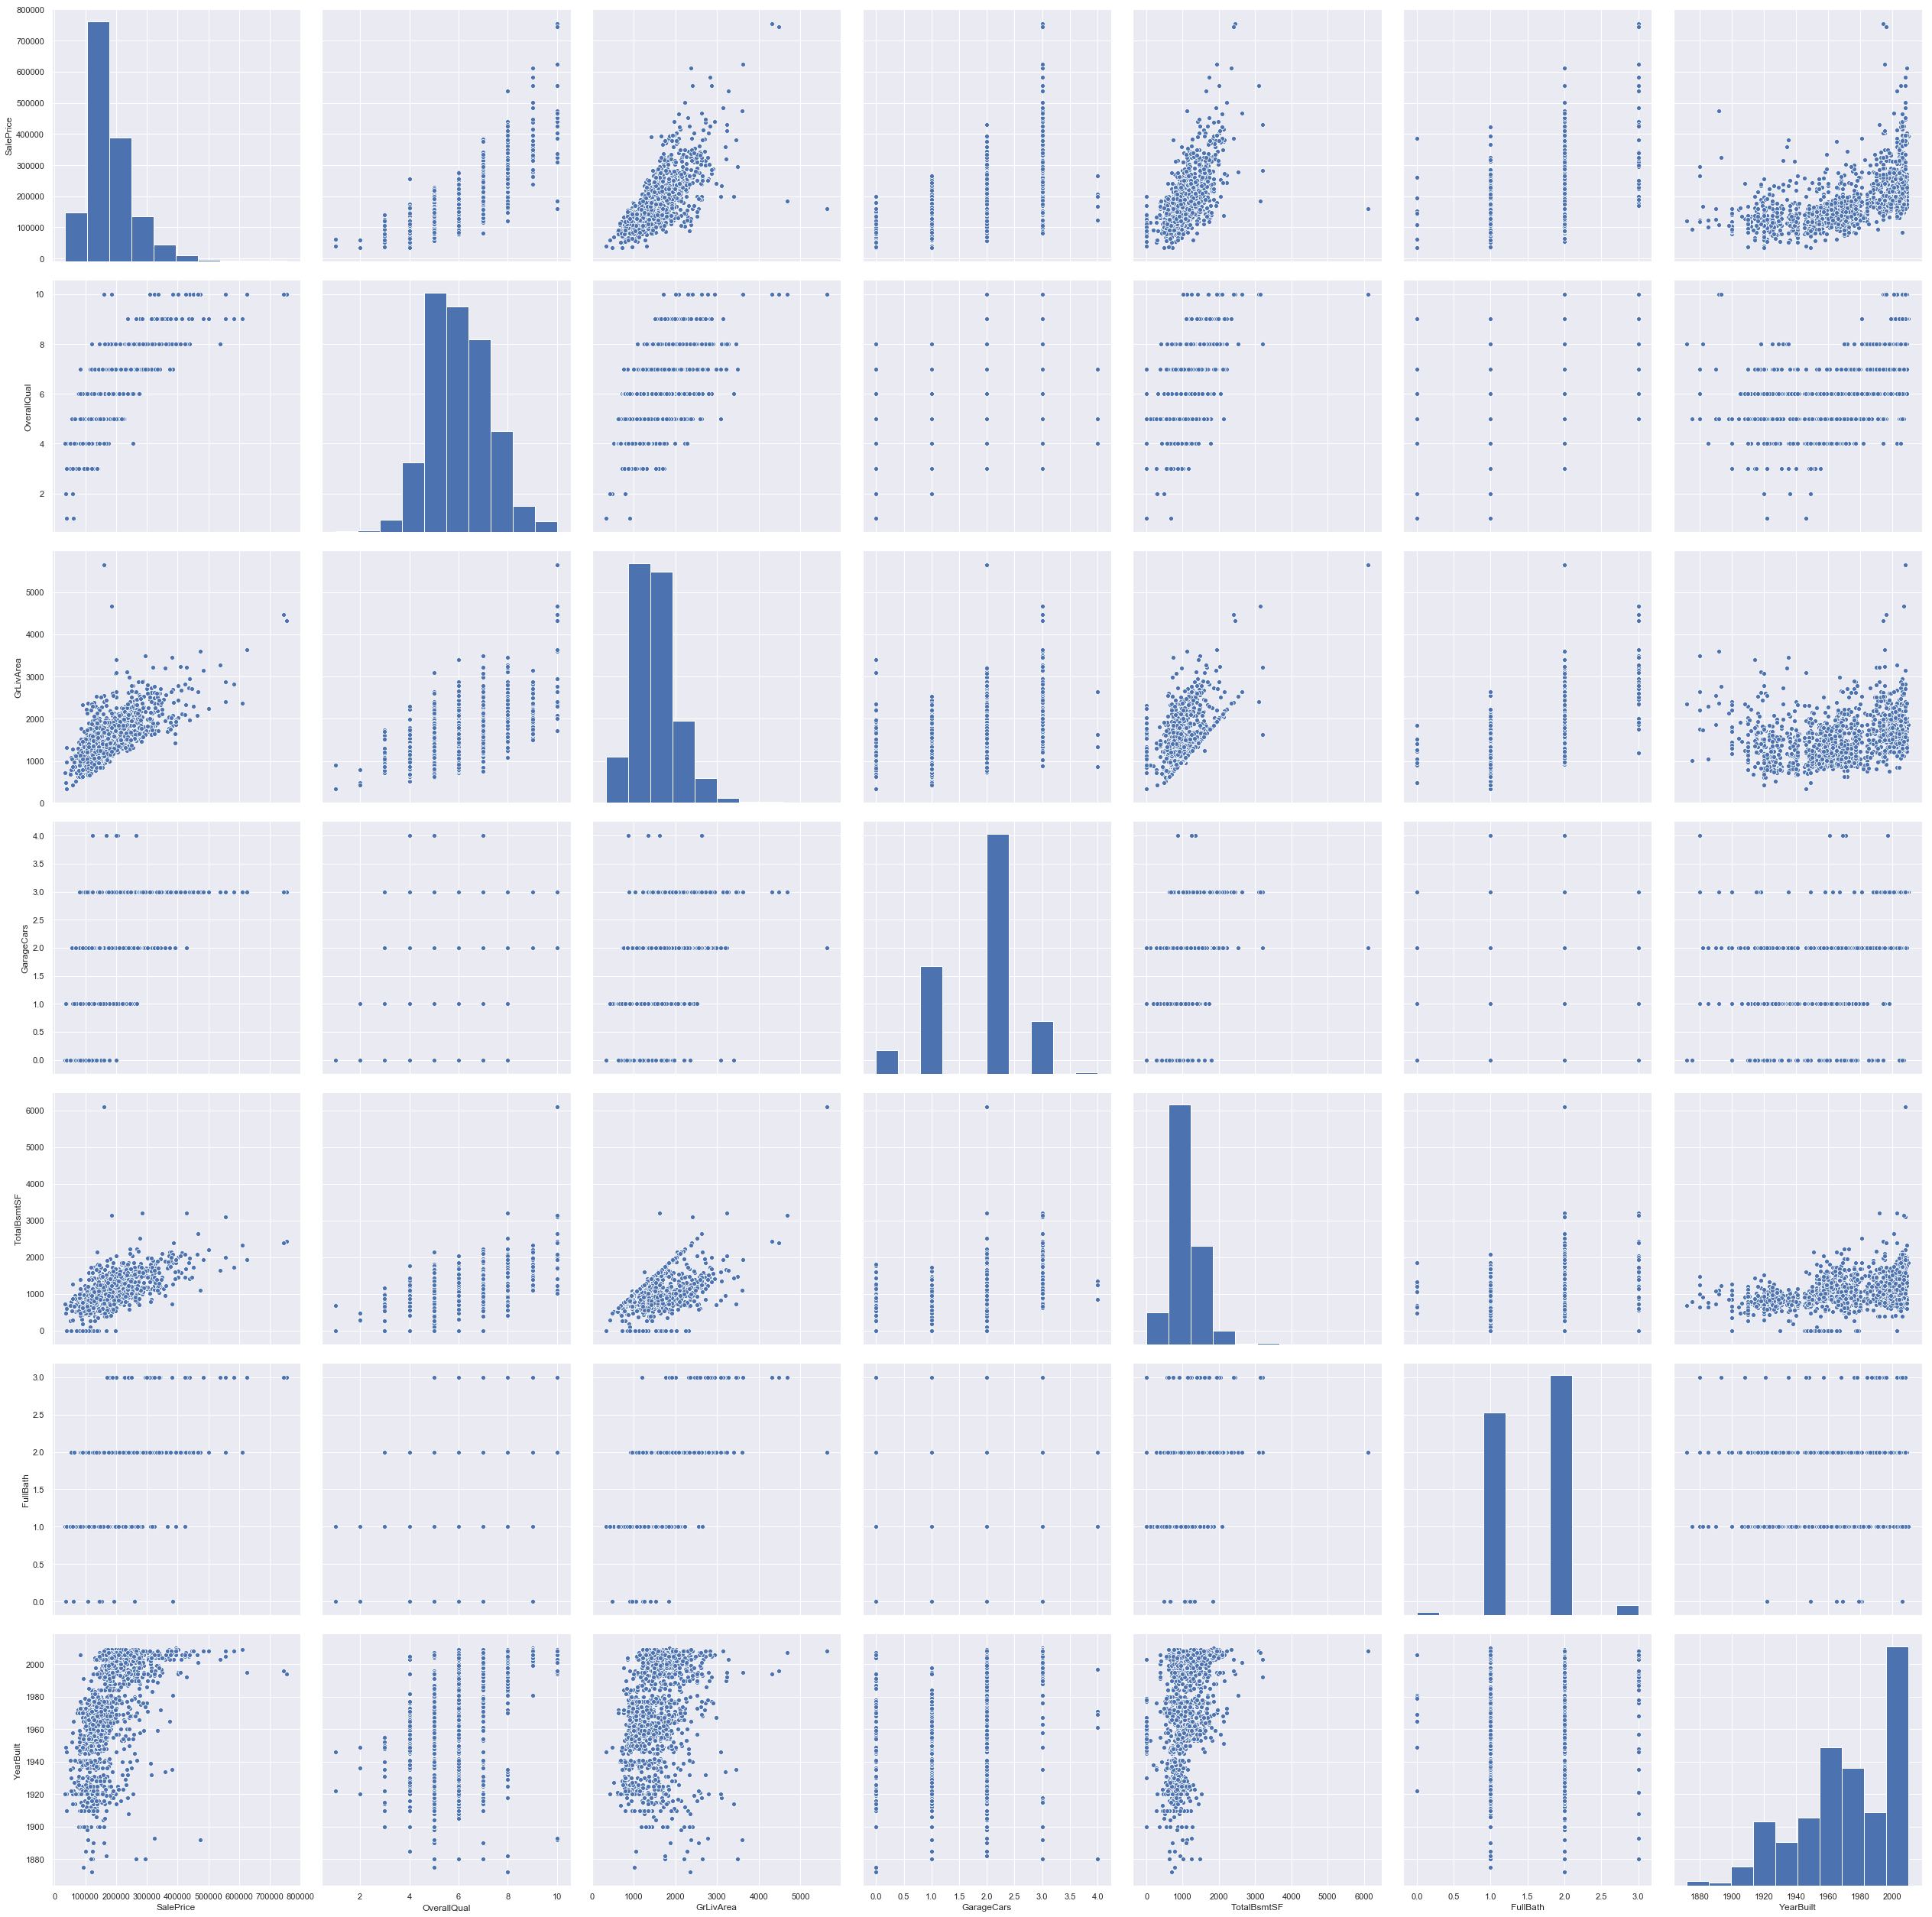

In [70]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 
        'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], height = 5)
plt.show()

## 6. Missing data handling

In [71]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(25)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [72]:
# Removing required columns or rows

df_train = df_train.drop(missing_data[missing_data['Total']>1].index,1)

df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

df_train.isnull().sum().max()

0

In [73]:
df_train.shape

(1459, 63)